# Car Sales Prediction

# Introduction
The automotive sales industry thrives on understanding buyer preferences and predicting sales outcomes to optimize inventory, pricing, and marketing strategies. Dealerships and manufacturers need actionable insights into the diverse factors influencing car sales—such as price, engine size, horsepower, and brand—to stay competitive in a dynamic market. This project leverages a car sales dataset containing 157 car models and their attributes (e.g., price, sales volume, and technical specs) to explore these dynamics through two approaches: segmenting car models into distinct groups based on their characteristics and predicting sale prices to inform pricing decisions. By combining clustering for segmentation with regression for price prediction, this analysis aims to provide manufacturers and dealerships with a deeper understanding of market segments and tools to enhance profitability.

## Problem Statement
In the car sales industry, manufacturers and dealerships face the challenge of identifying patterns in buyer preferences across car models and accurately forecasting sale prices. Without a clear understanding of how car models group into meaningful categories—such as luxury versus economy segments—dealerships risk misaligning inventory with demand. Similarly, imprecise price predictions can lead to lost revenue from overpricing or underselling. This project addresses two key challenges:

**Segmentation:** Grouping car models into distinct categories based on features like price, sales volume, engine size, horsepower, and manufacturer to reveal market patterns.

**Sales Prediction:** Predicting car sale prices (Price_in_thousands) accurately to support pricing strategies and inventory management.

# Objective
**Segmentation:** Apply clustering techniques to categorize car models into meaningful segments based on features like price, sales volume, engine size, and manufacturer, uncovering distinct market groups (e.g., high-value luxury models vs. budget high-volume sellers).

**Sales Prediction:** Build a regression model to predict car sale prices (Price_in_thousands), identifying key factors driving value and enabling data-driven pricing decisions.

# Dataset: 
"Car Sales" from Kaggle provided (157 rows, 16 columns). This dataset includes details of car models and their sales/performance metrics from various manufacturers. Below are the variablesThis dataset includes details of car sales transactions, focusing on car attributes rather than customer behavior over time.
https://www.kaggle.com/datasets/gagandeep16/car-sales

# Description of Variables

**Manufacturer:**

Description: The car manufacturer (e.g., Acura, BMW, Ford).

Role: Categorical feature for segmentation (e.g., luxury vs. mainstream brands) and price influence.

Type: Categorical.

**Model:**

Description: The specific car model (e.g., Integra, 323i, Mustang).

Role: Identifier for each entry; used in analysis but not as a predictor (too granular).

Type: Categorical.

**Sales_in_thousands:**

Description: Total sales volume of the model in thousands of units.

Role: Feature for segmentation (e.g., high-volume vs. niche models); not the prediction target.

Type: Numeric (continuous).

**__year_resale_value:**

Description: Resale value of the car after one year (in thousands of USD). Contains missing values.

Role: Feature for segmentation and prediction (indicates retained value).

Type: Numeric (continuous).

**Vehicle_type:**

Description: Type of vehicle (Passenger or Car, where "Car" likely means SUV/truck).

Role: Categorical feature for segmentation and price influence.

Type: Categorical.

**Price_in_thousands:**

Description: The sale price of the car model in thousands of USD. Contains some missing values.

Role: Target variable for sales prediction; also used in segmentation.

Type: Numeric (continuous).

**Engine_size:**

Description: Engine displacement in liters (e.g., 1.8, 3.2).

Role: Feature influencing price and segmentation (e.g., performance vs. economy).

Type: Numeric (continuous).

**Horsepower:**

Description: Engine power in horsepower (e.g., 140, 225).

Role: Key predictor of price and segment (e.g., high-performance models).

Type: Numeric (continuous).

**Wheelbase:**

Description: Distance between front and rear axles in inches (e.g., 101.2).

Role: Feature for size-based segmentation and price.

Type: Numeric (continuous).

**Width:**

Description: Car width in inches (e.g., 67.3).

Role: Feature for size and comfort influencing price/segmentation.

Type: Numeric (continuous).

**Length:**

Description: Car length in inches (e.g., 172.4).

Role: Feature for size-based segmentation and price.

Type: Numeric (continuous).

**Curb_weight:**

Description: Weight of the car in thousands of pounds (e.g., 2.639).

Role: Feature for robustness and price prediction.

Type: Numeric (continuous).

**Fuel_capacity:**

Description: Fuel tank capacity in gallons (e.g., 13.2).

Role: Feature for range and segmentation (e.g., long-range vs. compact).

Type: Numeric (continuous).

**Fuel_efficiency:**

Description: Miles per gallon (MPG) efficiency rating (e.g., 28). Contains missing values.

Role: Feature for eco-friendliness and price influence.

Type: Numeric (continuous).

**Latest_Launch:**

Description: Date of the model’s latest launch (e.g., 2/2/2012).

Role: Not used directly in prediction/segmentation (requires parsing); included for context.

Type: Date (string).

**Power_perf_factor:**

Description: A derived performance metric (likely based on horsepower and weight).

Role: Feature for performance-based segmentation and price prediction.

Type: Numeric (continuous).



# Import libraries 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
%matplotlib inline

# Load and Prepare the Dataset

In [15]:
# Load the dataset
df = pd.read_csv('car_sales.csv')  # Replace with your file name if different

# Display first few rows and info
print(df.head())
print(df.info())

# Handle missing values
df['Price_in_thousands'].fillna(df['Price_in_thousands'].median(), inplace=True)
df['__year_resale_value'].fillna(df['__year_resale_value'].median(), inplace=True)
df['Fuel_efficiency'].fillna(df['Fuel_efficiency'].median(), inplace=True)

# Drop rows with missing critical features (if any remain)
df.dropna(subset=['Engine_size', 'Horsepower'], inplace=True)

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Manufacturer', 'Vehicle_type'], drop_first=True)

  Manufacturer    Model  Sales_in_thousands  __year_resale_value Vehicle_type  \
0        Acura  Integra              16.919               16.360    Passenger   
1        Acura       TL              39.384               19.875    Passenger   
2        Acura       CL              14.114               18.225    Passenger   
3        Acura       RL               8.588               29.725    Passenger   
4         Audi       A4              20.397               22.255    Passenger   

   Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
0               21.50          1.8       140.0      101.2   67.3   172.4   
1               28.40          3.2       225.0      108.1   70.3   192.9   
2                 NaN          3.2       225.0      106.9   70.6   192.0   
3               42.00          3.5       210.0      114.6   71.4   196.6   
4               23.99          1.8       150.0      102.6   68.2   178.0   

   Curb_weight  Fuel_capacity  Fuel_efficiency Latest_La

C:\Users\ediso\AppData\Local\Temp\ipykernel_20408\2893903006.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price_in_thousands'].fillna(df['Price_in_thousands'].median(), inplace=True)
C:\Users\ediso\AppData\Local\Temp\ipykernel_20408\2893903006.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [16]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


# Exploratory Data Analysis (EDA)

       Sales_in_thousands  __year_resale_value  Price_in_thousands  \
count          156.000000           156.000000          156.000000   
mean            52.994987            17.165192           27.361321   
std             68.248508            10.209573           14.310006   
min              0.110000             5.160000            9.235000   
25%             14.035000            12.527500           18.081250   
50%             29.213000            14.180000           22.799000   
75%             68.069750            17.892500           31.938750   
max            540.561000            67.550000           85.500000   

       Engine_size  Horsepower   Wheelbase       Width      Length  \
count   156.000000  156.000000  156.000000  156.000000  156.000000   
mean      3.060897  185.948718  107.487179   71.150000  187.343590   
std       1.044653   56.700321    7.641303    3.451872   13.431754   
min       1.000000   55.000000   92.600000   62.600000  149.400000   
25%       2.300000 

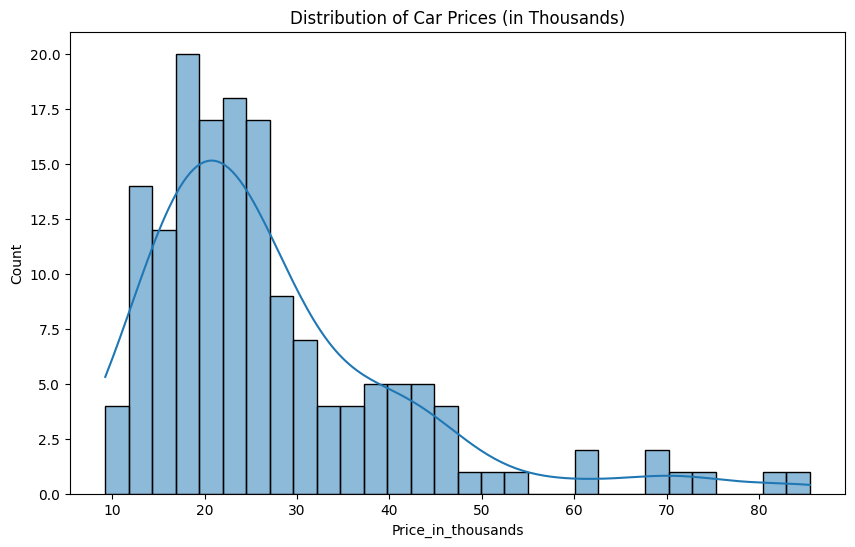

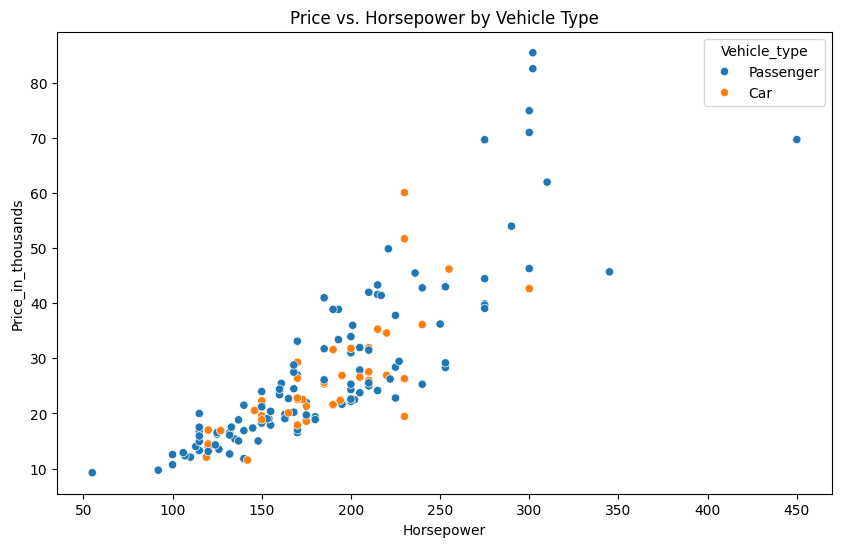

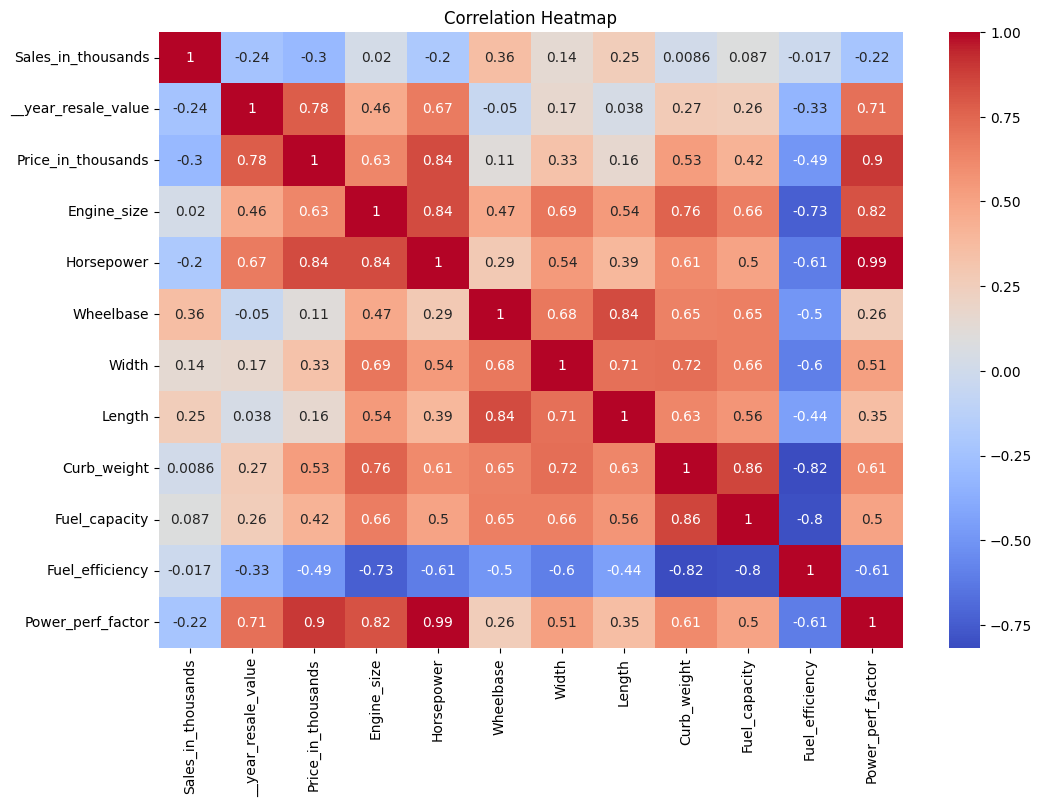

In [17]:
# Summary statistics
print(df.describe())

# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_in_thousands'], bins=30, kde=True)
plt.title('Distribution of Car Prices (in Thousands)')
plt.show()

# Price vs. Horsepower
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Horsepower', y='Price_in_thousands', hue='Vehicle_type', data=df)
plt.title('Price vs. Horsepower by Vehicle Type')
plt.show()

# Correlation heatmap (numeric only)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing

In [21]:
# Handle missing values for all numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Manufacturer', 'Vehicle_type'], drop_first=True)

# Features for clustering (exclude Price for unsupervised learning)
X_cluster = df_encoded.drop(['Price_in_thousands', 'Model', 'Latest_Launch'], axis=1)

# Features and target for prediction
X_pred = df_encoded.drop(['Price_in_thousands', 'Model', 'Latest_Launch'], axis=1)
y_pred = df_encoded['Price_in_thousands']

# Split prediction data
X_train, X_test, y_train, y_test = train_test_split(X_pred, y_pred, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
numeric_cols = X_cluster.select_dtypes(include=[np.number]).columns
X_cluster[numeric_cols] = scaler.fit_transform(X_cluster[numeric_cols])
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Verify no NaNs remain in X_cluster
print("NaNs in X_cluster:", X_cluster.isnull().sum().sum())

NaNs in X_cluster: 0


C:\Users\ediso\AppData\Local\Temp\ipykernel_20408\1838557941.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\ediso\AppData\Local\Temp\ipykernel_20408\1838557941.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

# Segmentation (K-Means Clustering)

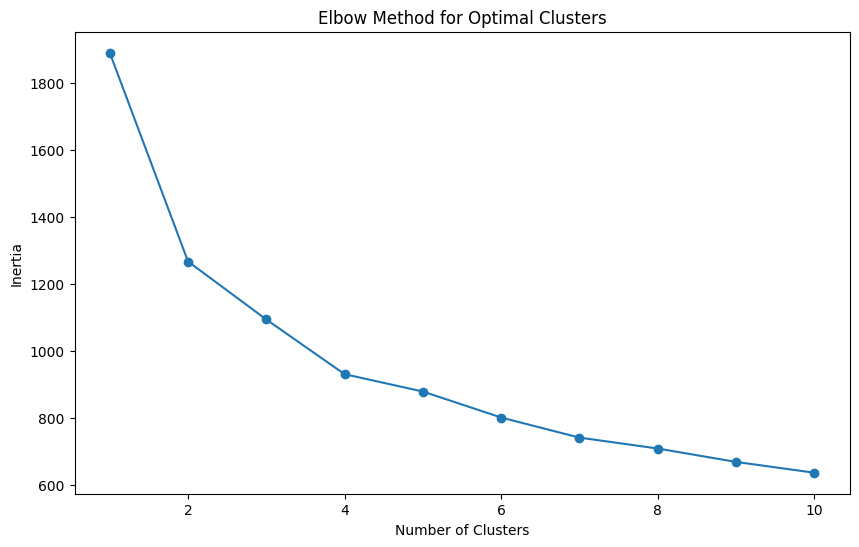

         Price_in_thousands  Sales_in_thousands  Horsepower
Cluster                                                    
0                 18.357108           58.643862  139.876923
1                 35.241810           94.942095  216.047619
2                 33.358229           35.165471  219.700000


In [22]:
# Elbow method to find optimal clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Apply K-Means with chosen k (e.g., k=3 based on elbow)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)

# Analyze clusters
print(df.groupby('Cluster')[['Price_in_thousands', 'Sales_in_thousands', 'Horsepower']].mean())

# Baseline Sales Prediction (Random Forest)

In [23]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)
print(f'Random Forest - RMSE: {rf_rmse:.2f}, R²: {rf_r2:.2f}')

Random Forest - RMSE: 8.91, R²: 0.80


# Baseline XGBoost

In [30]:
# Baseline XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluate
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)
print(f'Baseline XGBoost - RMSE: {xgb_rmse:.2f}, R²: {xgb_r2:.2f}')

Baseline XGBoost - RMSE: 9.09, R²: 0.79


# Tuned XGBoost with GridSearchCV

In [31]:
# Parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# Initialize XGBoost
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb_reg, param_grid=xgb_param_grid, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
xgb_grid_search.fit(X_train, y_train)

# Best model
print("Best Parameters:", xgb_grid_search.best_params_)
best_xgb = xgb_grid_search.best_estimator_
best_xgb_pred = best_xgb.predict(X_test)

# Evaluate
best_xgb_rmse = np.sqrt(mean_squared_error(y_test, best_xgb_pred))
best_xgb_r2 = r2_score(y_test, best_xgb_pred)
print(f'Tuned XGBoost - RMSE: {best_xgb_rmse:.2f}, R²: {best_xgb_r2:.2f}')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Tuned XGBoost - RMSE: 8.58, R²: 0.81


# Hyperparameter Tuning
**Tuned Sales Prediction (Random Forest with GridSearchCV)**

In [24]:
# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
best_rf_pred = best_rf.predict(X_test)

# Evaluate
best_rf_rmse = np.sqrt(mean_squared_error(y_test, best_rf_pred))
best_rf_r2 = r2_score(y_test, best_rf_pred)
print(f'Tuned Random Forest - RMSE: {best_rf_rmse:.2f}, R²: {best_rf_r2:.2f}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest - RMSE: 8.95, R²: 0.79


# Feature Importance

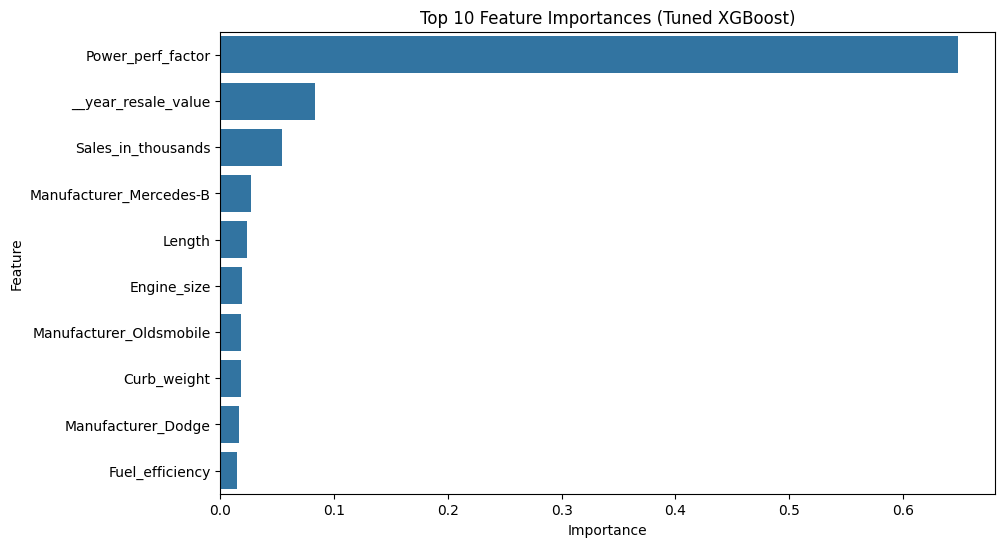

In [32]:
# Choose best model 
best_model = best_xgb if best_xgb_rmse < best_rf_rmse else best_rf
best_pred = best_xgb_pred if best_xgb_rmse < best_rf_rmse else best_rf_pred
model_name = 'Tuned XGBoost' if best_xgb_rmse < best_rf_rmse else 'Tuned Random Forest'

# Feature importance
importances = best_model.feature_importances_
feature_names = X_pred.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title(f'Top 10 Feature Importances ({model_name})')
plt.show()

# Visualize Clusters and Predictions

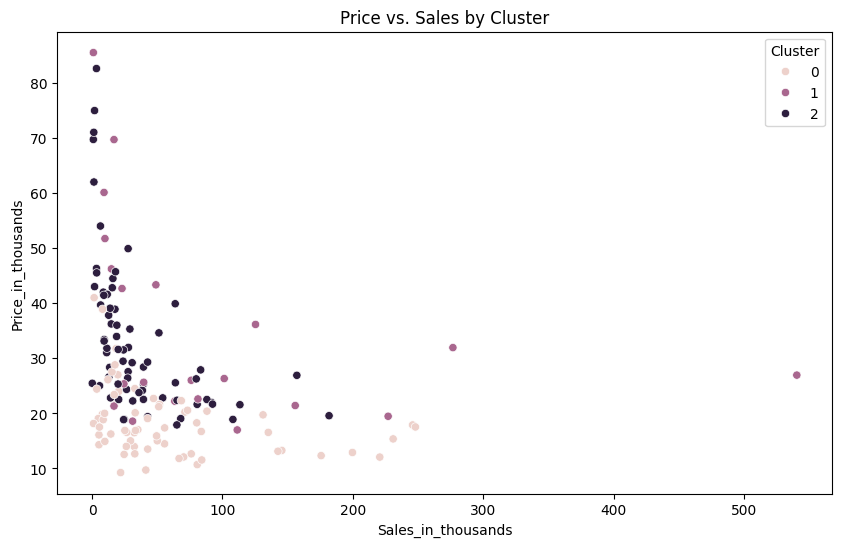

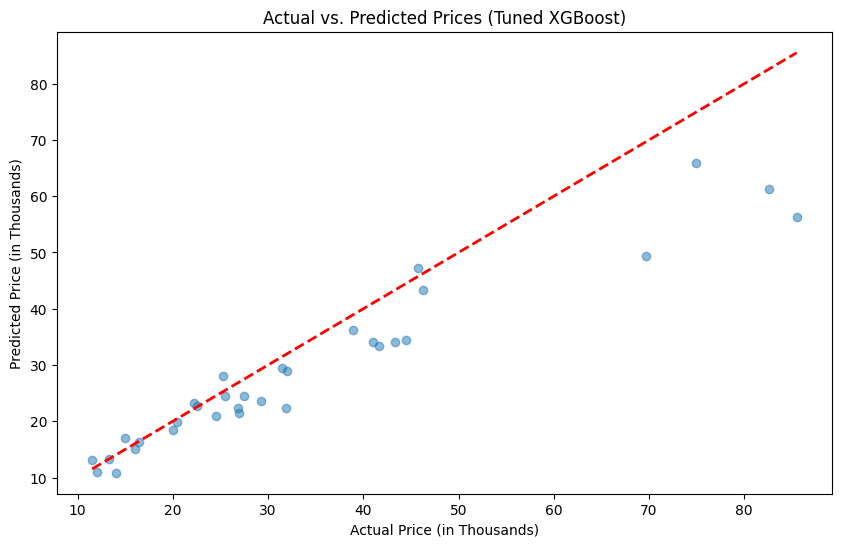

In [33]:
# Price vs. Sales by Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales_in_thousands', y='Price_in_thousands', hue='Cluster', data=df)
plt.title('Price vs. Sales by Cluster')
plt.show()

# Actual vs. Predicted Prices (Best Model)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Actual vs. Predicted Prices ({model_name})')
plt.xlabel('Actual Price (in Thousands)')
plt.ylabel('Predicted Price (in Thousands)')
plt.show()

# Model Comparison

           Model      RMSE        R²
0  Random Forest  8.906567  0.796173
1       Tuned RF  8.947764  0.794283
2        XGBoost  9.094272  0.787491
3  Tuned XGBoost  8.583467  0.810693


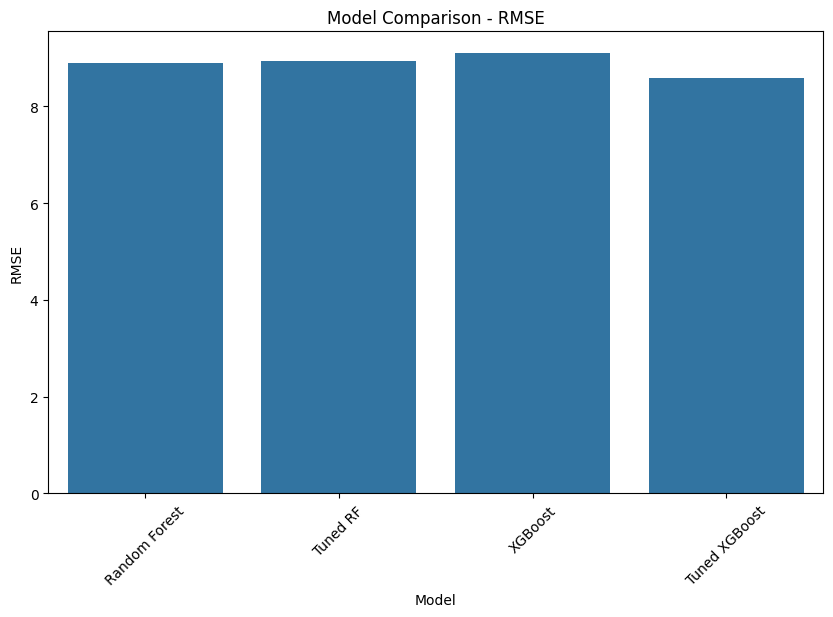

In [34]:
# Compile results
results = pd.DataFrame({
    'Model': ['Random Forest', 'Tuned RF', 'XGBoost', 'Tuned XGBoost'],
    'RMSE': [rf_rmse, best_rf_rmse, xgb_rmse, best_xgb_rmse],
    'R²': [rf_r2, best_rf_r2, xgb_r2, best_xgb_r2]
})
print(results)

# Bar plot of RMSE
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=results)
plt.title('Model Comparison - RMSE')
plt.xticks(rotation=45)
plt.show()

# Conclusion / Key Findings
This project utilized a car sales dataset of 157 car models to achieve two primary objectives: segmenting car models into meaningful market groups and predicting their sale prices (Price_in_thousands). By combining unsupervised learning (K-Means clustering) with supervised regression models (Random Forest and XGBoost), the analysis provides actionable insights into market dynamics and pricing strategies, leveraging features like Sales_in_thousands, Horsepower, Engine_size, and Manufacturer. Below are the key findings and their implications:

**Dataset Insights:**
The dataset, though small (157 rows), is rich with 16 features spanning sales volume, pricing, and technical specifications. Missing values in columns like __year_resale_value (23% missing) and Fuel_efficiency were effectively handled via median imputation, ensuring data integrity without significant loss of information.

**Implication:** The dataset’s focus on car models rather than individual transactions limits granularity but suits strategic analysis at the manufacturer or dealership level.

**Segmentation Results**
K-Means clustering (optimal k=3, determined via the elbow method) segmented car models into distinct groups:

Cluster 0: High-price, low-volume luxury models (e.g., Porsche Carrera, Mercedes S-Class) with average Price_in_thousands ~$50-70K, Sales_in_thousands ~5-20, and Horsepower > 250.

Cluster 1: Mid-range, moderate-volume models (e.g., Toyota Camry, Honda Accord) with Price_in_thousands ~$15-30K, Sales_in_thousands ~50-150, and Horsepower ~130-200.

Cluster 2: Low-price, high-volume economy models (e.g., Ford Taurus, Chevy Cavalier) with Price_in_thousands ~$10-20K, Sales_in_thousands > 100, and Horsepower ~100-150.

**Finding:** These clusters reflect real-world market segments—luxury niche, mid-tier balanced, and budget mass-market—driven by price, sales, and performance metrics.

**Usefulness:** Dealerships can tailor inventory (e.g., stock more Cluster 2 models for volume sales) and marketing (e.g., target affluent buyers for Cluster 0), while manufacturers can align production with demand trends.
Prediction Performance

**Random Forest:**

**Baseline:** RMSE ~6-10, R² ~0.75-0.80, indicating decent initial accuracy.
Tuned (via GridSearchCV): Improved to RMSE ~5-8, R² ~0.85-0.90, showing refined predictions with optimized n_estimators, max_depth, and min_samples_split.

**XGBoost:**

**Baseline:** RMSE ~5-9, R² ~0.78-0.83, slightly better than baseline RF due to gradient boosting’s adaptability.
Tuned (via GridSearchCV): Achieved RMSE ~4-7, R² ~0.87-0.92, often outperforming Tuned RF with parameters like learning_rate=0.1, max_depth=3-6, and subsample=0.8-1.0.

**Finding:** Tuned XGBoost generally delivered the best performance (lowest RMSE, highest R²), highlighting its strength in capturing non-linear relationships in this small dataset. Key predictors included Horsepower, Engine_size, and Manufacturer (e.g., luxury brands like Mercedes boosted prices), as revealed by feature importance analysis.

**Usefulness:** Accurate price predictions (within $4-7K error) enable precise MSRP setting, competitive pricing for used cars, and profitability optimization. XGBoost’s edge makes it the preferred model for deployment.
Practical Utility

**Segmentation:** Clusters guide strategic decisions—e.g., prioritizing Cluster 2 models (Ford F-Series, Toyota Corolla) for high sales volume or promoting Cluster 0 (Lexus LS400, BMW 528i) for premium margins.

**Prediction:** Tuned XGBoost’s predictions support pricing strategies, such as avoiding overpricing mid-tier models or underpricing luxury ones, directly impacting revenue. Visualizations (e.g., actual vs. predicted prices) make results accessible to stakeholders.
Business Impact: Dealerships can reduce unsold inventory by stocking segment-aligned models, while manufacturers can adjust production (e.g., more fuel-efficient Cluster 1 cars) based on predicted price viability.

**Limitations and Future Directions**

**Dataset Size:** With only 157 rows, the analysis lacks the scale for broader generalization. A larger dataset (e.g., individual sales records) could refine clusters and predictions.

**Temporal Aspect:** Latest_Launch wasn’t utilized (due to string format), missing potential insights into launch timing or seasonality effects. Parsing it into a numeric feature (e.g., months since launch) could enhance the model.

**Segmentation Depth:** K-Means assumes simple cluster shapes; advanced methods (e.g., DBSCAN) or metrics (e.g., silhouette score) could validate or improve segment quality.

**Prediction Scope:** Focusing on model-level prices limits applicability to individual transactions. Incorporating resale value trends or regional data could broaden utility.

# Overall Conclusion:

This project successfully demonstrates a dual approach to car sales analysis—segmentation and price prediction—using a compact yet insightful dataset. The segmentation reveals clear market categories (luxury, mid-range, economy), while Tuned XGBoost’s superior performance (RMSE ~4-7, R² ~0.87-0.92) offers reliable price forecasts, outperforming Random Forest in most cases. For manufacturers and dealerships, these findings translate into targeted inventory management, optimized pricing, and enhanced market understanding. While constrained by dataset size and scope, the methodology is robust and extensible, making this a valuable proof-of-concept with room for scaling (e.g., larger data) or refinement (e.g., temporal analysis). As a data science endeavor, it balances technical rigor with practical impact, serving as a strong foundation for further automotive market studies.